In [1]:
!pip install matplotlib
!pip install scikit-image
!pip install torch torchvision torchaudio
!pip install scikit-learn
!pip3 install git+https://github.com/facebookresearch/segment-anything.git
!pip install opencv-python
!apt update && apt install -y libgl1
!apt install git-lfs


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-o38rzeyc
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-o38rzeyc
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24

Mask not found: dense_data/abyss/bomb/mask_0100.png
Mask not found: dense_data/abyss/pickup/mask_0100.png
Mask not found: dense_data/abyss/projectile/mask_0100.png
Name: 0100
Road: abyss
Masks:
  - 0100_frame (Path: dense_data/abyss/frame/frame_0100.png, Has Mask: True)
  - 0100_kart (Path: dense_data/abyss/kart/mask_0100.png, Has Mask: True)
  - 0100_nitro (Path: dense_data/abyss/nitro/mask_0100.png, Has Mask: True)
  - 0100_background (Path: dense_data/abyss/background/mask_0100.png, Has Mask: True)
  - 0100_bomb (Path: dense_data/abyss/bomb/mask_0100.png, Has Mask: False)
  - 0100_pickup (Path: dense_data/abyss/pickup/mask_0100.png, Has Mask: False)
  - 0100_projectile (Path: dense_data/abyss/projectile/mask_0100.png, Has Mask: False)
  - 0100_track (Path: dense_data/abyss/track/mask_0100.png, Has Mask: True)
  - 0100_combined (Path: dense_data/abyss/combined/mask_combined_0100.png, Has Mask: True)


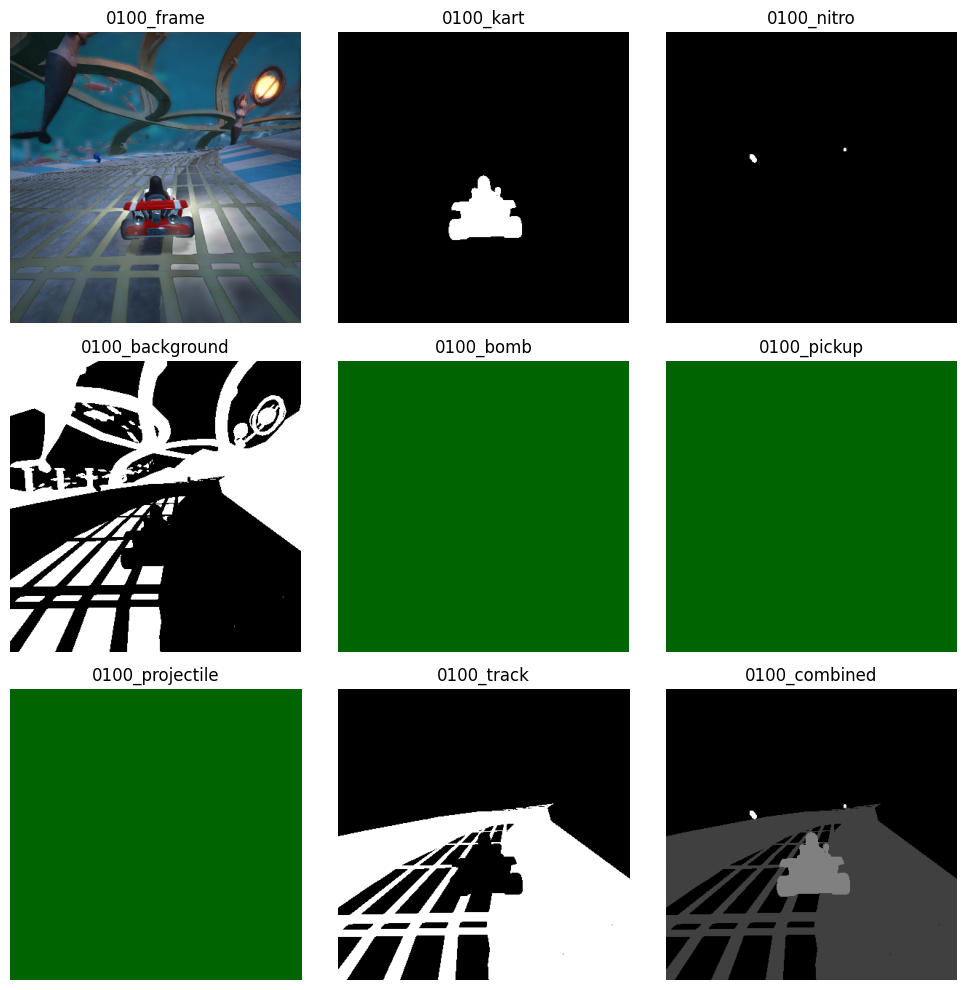

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from PIL import Image

class kart_frame:
    def __init__ (self, name, road):
        self.name = name
        self.road = road
        self.base_path = "dense_data/{}/{}/{}_{}.png"
        self.masks = []
        self.images = []
        self.load_masks()
            
    def load_masks(self):
        frames = ["frame","kart","nitro","background","bomb","pickup","projectile","track","combined"]
        
        for frame in frames:
            mask = {}
            image_prefix = "mask"
            
            if(frame == "frame"):
                image_prefix = "frame"
            elif(frame == "combined"):
                image_prefix="mask_combined"

            image_path = self.base_path.format(self.road, frame, image_prefix, self.name)

            mask[frame] = image_path
            if not os.path.exists(image_path):
                print(f"Mask not found: {image_path}")
                mask["hasMask"] = False
                mask["image"] = Image.new("RGB", (256, 256), color=(0, 100, 0)) 
            else:
                mask["hasMask"] = True
                mask["image"] = Image.open(image_path)

            mask["name"] = self.name
            mask["road"] = self.road
            mask["mask_name"] = f"{self.name}_{frame}"
            mask["image_prefix"] = image_prefix
            mask["image_path"] = image_path
            mask["frame"] = frame
            
            self.masks.append(mask)

    def print_info(self):
        print(f"Name: {self.name}")
        print(f"Road: {self.road}")
        print("Masks:")
        for mask in self.masks:
            print(f"  - {mask['mask_name']} (Path: {mask['image_path']}, Has Mask: {mask['hasMask']})")

    def print_masks(self):
        fig, ax = plt.subplots(3,3,figsize=(10, 10))

        index = 0
        for i in range(3):
            for j in range(3):        
                img = self.masks[index]["image"]#images[index]
                name = self.masks[index]["mask_name"]#names[index]
                ax[i][j].imshow(img, cmap="gray")
                ax[i][j].axis('off')
                ax[i][j].set_title(name)
                index += 1
                
        plt.tight_layout()
        plt.show()

    def ensure_grayscale(self, img):
        """
        Devuelve una versión en escala de grises de una imagen.
        Si ya está en escala de grises, la devuelve tal cual.
        """
        img_array = np.array(img)

        if len(img_array.shape) == 2:
            return img_array  # Ya es gris
        elif len(img_array.shape) == 3 and img_array.shape[2] == 3:
            return rgb2gray(img_array)
        else:
            raise ValueError(f"Formato de imagen no soportado: {img_array.shape}")

    def get_similar_mask(self, mask_to_compare):

        similarity = 0
        similar_mask = None
        gray_mask_to_compare = self.ensure_grayscale(mask_to_compare)
        binary_mask_to_compare = gray_mask_to_compare > 0.5
        
        for mask in self.masks:
            print(mask)
            if not mask["hasMask"]:
                continue

            #local_gray_mask = rgb2gray(mask["image"])
            local_gray_mask = self.ensure_grayscale(mask["image"])
            binary_mask_local = local_gray_mask > 0.5

            print(f"Comparing with mask: {mask['mask_name']}")
            current_similarity = np.sum(binary_mask_to_compare == binary_mask_local) / mask_to_compare.size
            if current_similarity > similarity:
                similarity = current_similarity
                similar_mask = mask["image"]

        return similarity, similar_mask
                

frame = kart_frame("0100", "abyss")
frame.print_info()  
frame.print_masks()

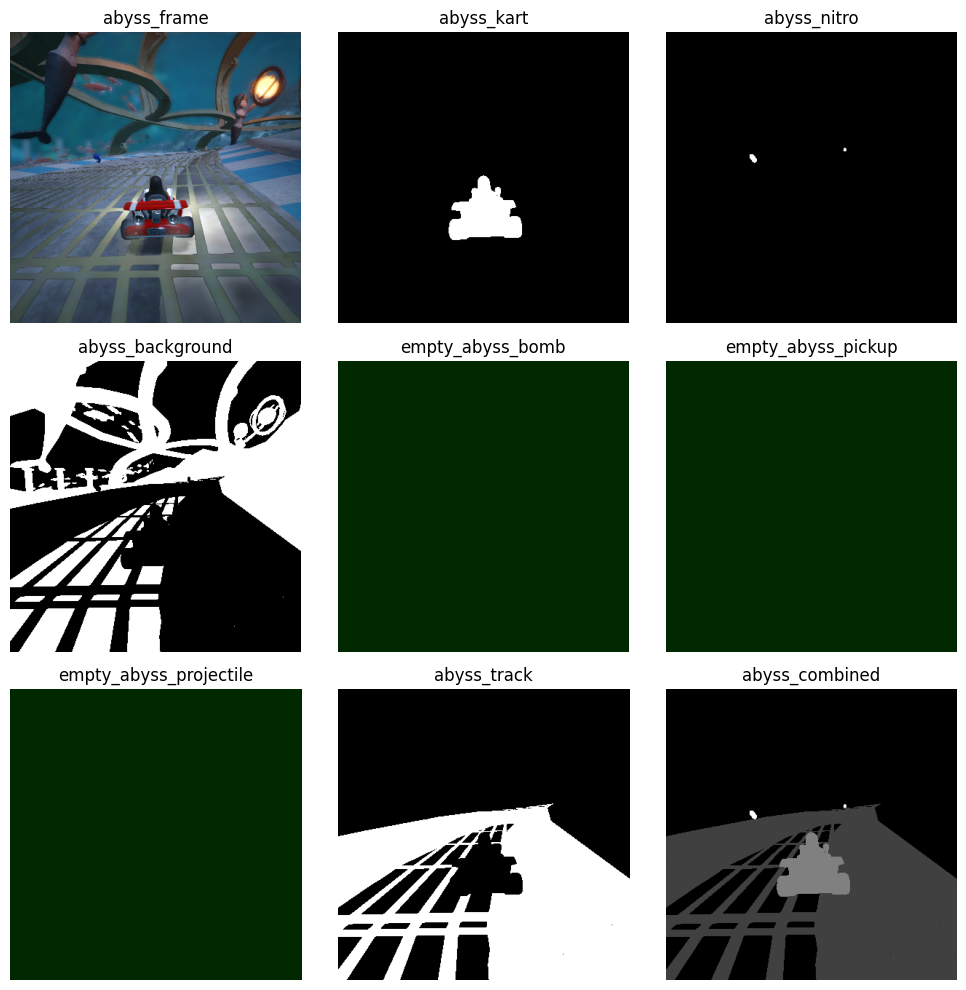

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

images_path = []

def show_image_and_mask(name):
    roads = ["abyss"]
    frames = ["frame","kart","nitro","background","bomb","pickup","projectile","track","combined"]
    base_path = "dense_data/{}/{}/{}_{}.png"
    images = []
    names = []
    images_path = []

    for road in roads:
        for frame in frames:
            image_prefix = "mask"
            
            if(frame == "frame"):
                image_prefix = "frame"
            elif(frame == "combined"):
                image_prefix="mask_combined"

            image_path = base_path.format(road, frame, image_prefix, name)
            images_path.append(image_path)
            #print(f"Loading image from: {image_path}")

            if not os.path.exists(image_path):
                #print(f"Image not found: {image_path}")
                image = Image.new("RGB", (256, 256), color=(0, 40, 0))
                images.append(image)
                names.append(f"empty_{road}_{frame}")
                continue

            image = Image.open(image_path)
            ancho, alto = image.size
            images.append(image)
            names.append(f"{road}_{frame}")


    fig, ax = plt.subplots(3,3,figsize=(10, 10))

    index = 0
    for i in range(3):
        for j in range(3):        
            img = images[index]
            name = names[index]
            ax[i][j].imshow(img, cmap="gray")
            ax[i][j].axis('off')
            ax[i][j].set_title(name)
            index += 1
            
    plt.tight_layout()
    plt.show()
    return images_path

name = "0100" 
images_path = show_image_and_mask(name)

In [4]:
import os
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import v2

class SuperTuxKartDataset(Dataset):
    def __init__(self, root_dir, tracks, transform_img=None, transform_mask=None):
        if isinstance(tracks, str):
            tracks = [tracks]

        self.image_paths = []
        self.mask_paths = []

        for track in tracks:
            image_dir = os.path.join(root_dir, track, "frame")
            mask_dir = os.path.join(root_dir, track, "combined")

            image_files = sorted([
                f for f in os.listdir(image_dir) if f.endswith(".png")
            ])
            mask_files = sorted([
                f for f in os.listdir(mask_dir) if f.endswith(".png")
            ])

            assert len(image_files) == len(mask_files), f"Track '{track}' tiene distinto número de imágenes y máscaras."

            for img_file, mask_file in zip(image_files, mask_files):
                self.image_paths.append(os.path.join(image_dir, img_file))
                self.mask_paths.append(os.path.join(mask_dir, mask_file))

        self.transform_img = transform_img
        self.transform_mask = transform_mask

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]

        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path)

        if self.transform_img:
            image = self.transform_img(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)
        else:
            mask = torch.from_numpy(np.array(mask)).long()

        return image, mask

In [5]:
from collections import Counter

def get_class_name(index):
    class_names = [
        "Background", "Track", "Kart", "Pickup", "Nitro", "Bomb", "Projectile"
    ]
    if 0 <= index < len(class_names):
        return class_names[index]
    else:
        return "Unknown Class"

def contar_clases_dataset(dataset):
    contador = Counter()

    for _, mask in dataset:
        if mask.ndim == 3 and mask.shape[0] == 1:
            mask = mask.squeeze(0)
        valores, conteos = torch.unique(mask, return_counts=True)
        for val, count in zip(valores.tolist(), conteos.tolist()):
            contador[val] += count

    print("Distribución de clases en el dataset:")
    for clase, cantidad in sorted(contador.items()):
        print(f"Clase { get_class_name(clase)}: {cantidad} píxeles")

    return contador

def tiene_clase_rara(mask):
  clases_raras = {3, 4, 5, 6}
  return any(c in clases_raras for c in torch.unique(mask).tolist())

def get_rare_sample(dataset):
  rare_samples = [dataset[i] for i in range(len(dataset)) if tiene_clase_rara(dataset[i][1])]
  return rare_samples

Imagen: torch.Size([3, 224, 224]), Máscara: torch.Size([1, 224, 224]), Clases: tensor([0, 1, 2, 4])


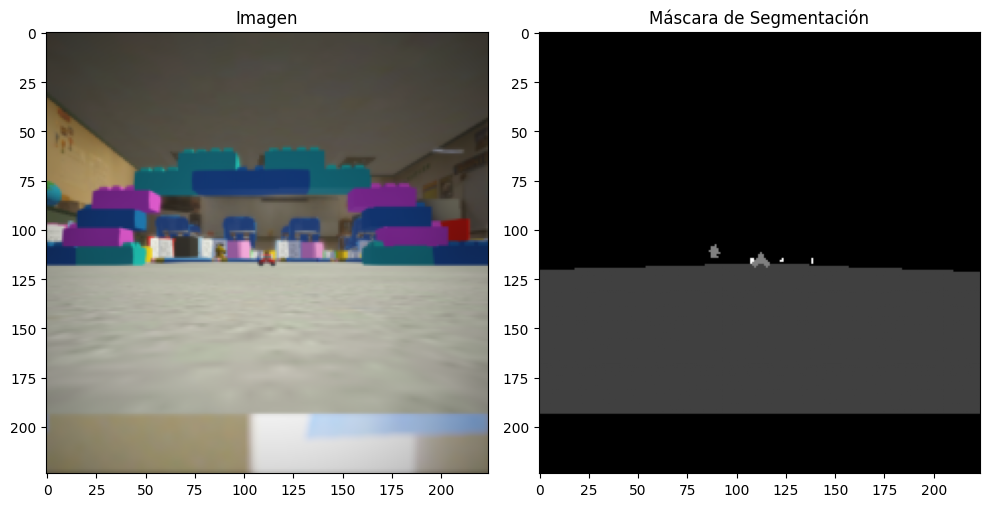

In [6]:
from torchvision.transforms import v2
from torch.utils.data import DataLoader, random_split
from torch.utils.data import ConcatDataset

CMAP="gray"

transform_img_old = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.CenterCrop(400),
    v2.Resize((224, 224))
])

transform_mask = v2.Compose([
    v2.ToImage(),
    v2.CenterCrop(400),
    v2.Resize((224, 224), interpolation=Image.NEAREST),
    v2.ToDtype(torch.int64)
])

tracks = ["olivermath", "abyss", "gran_paradiso_island", "lighthouse","volcano_island","hacienda"]

dataset = SuperTuxKartDataset(
    root_dir="dense_data",
    tracks=tracks,
    transform_img=transform_img_old,
    transform_mask=transform_mask
)

rare_samples = get_rare_sample(dataset)
augmented_dataset = ConcatDataset([dataset] + [rare_samples] * 50)

train_size = int(0.8 * len(augmented_dataset))
test_size = len(augmented_dataset) - train_size
train_dataset, test_dataset = random_split(augmented_dataset, [train_size, test_size], generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_dataset, batch_size=180, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=180, shuffle=False)

img, mask = dataset[0]
print(f"Imagen: {img.shape}, Máscara: {mask.shape}, Clases: {torch.unique(mask)}")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img.permute(1, 2, 0).cpu().numpy())
plt.title("Imagen")

plt.subplot(1, 2, 2)
plt.imshow(mask.squeeze().cpu().numpy(), cmap=CMAP)
plt.title("Máscara de Segmentación")

plt.tight_layout()
plt.show()

In [7]:
!pip install requests


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [8]:
import requests

url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth"
filename = "sam_vit_b_01ec64.pth"

print(f"Descargando {filename} desde {url} ...")

response = requests.get(url, stream=True)
response.raise_for_status()  # Lanza error si la descarga falla

with open(filename, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print(f"✅ Descarga completa: {filename}")


Descargando sam_vit_b_01ec64.pth desde https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth ...
✅ Descarga completa: sam_vit_b_01ec64.pth


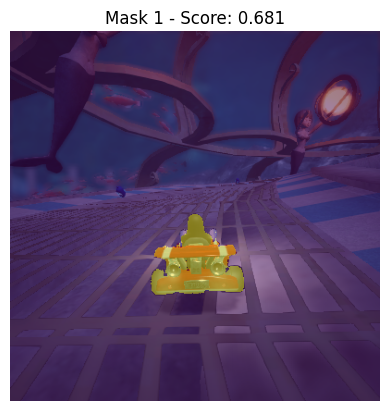

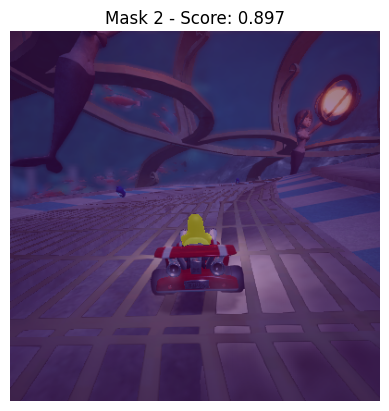

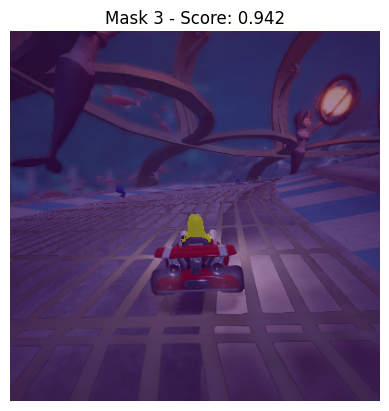

In [9]:
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
from segment_anything import SamPredictor, build_sam_vit_b

image_path = images_path[0]  
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Ruta del checkpoint SAM y tipo de modelo
sam_checkpoint = "sam_vit_b_01ec64.pth"
model = build_sam_vit_b(checkpoint=None)  # Evita carga automática con weights_only=True

# Cargar manualmente los pesos con weights_only=False
state_dict = torch.load(sam_checkpoint, map_location="cpu", weights_only=False)
model.load_state_dict(state_dict)

# Crear predictor y cargar imagen
predictor = SamPredictor(model)
predictor.set_image(image)

# Punto de entrada manual para segmentación (centro de la imagen)
input_point = np.array([[image.shape[1] // 2, image.shape[0] // 2]])
input_label = np.array([1])  # foreground

# Realizar predicción
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

# Mostrar máscaras sobre la imagen
for i, mask in enumerate(masks):
    plt.figure()
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5)
    plt.title(f"Mask {i+1} - Score: {scores[i]:.3f}")
    plt.axis("off")
plt.show()


Mask not found: dense_data/abyss/bomb/mask_0100.png
Mask not found: dense_data/abyss/pickup/mask_0100.png
Mask not found: dense_data/abyss/projectile/mask_0100.png
Name: 0100
Road: abyss
Masks:
  - 0100_frame (Path: dense_data/abyss/frame/frame_0100.png, Has Mask: True)
  - 0100_kart (Path: dense_data/abyss/kart/mask_0100.png, Has Mask: True)
  - 0100_nitro (Path: dense_data/abyss/nitro/mask_0100.png, Has Mask: True)
  - 0100_background (Path: dense_data/abyss/background/mask_0100.png, Has Mask: True)
  - 0100_bomb (Path: dense_data/abyss/bomb/mask_0100.png, Has Mask: False)
  - 0100_pickup (Path: dense_data/abyss/pickup/mask_0100.png, Has Mask: False)
  - 0100_projectile (Path: dense_data/abyss/projectile/mask_0100.png, Has Mask: False)
  - 0100_track (Path: dense_data/abyss/track/mask_0100.png, Has Mask: True)
  - 0100_combined (Path: dense_data/abyss/combined/mask_combined_0100.png, Has Mask: True)


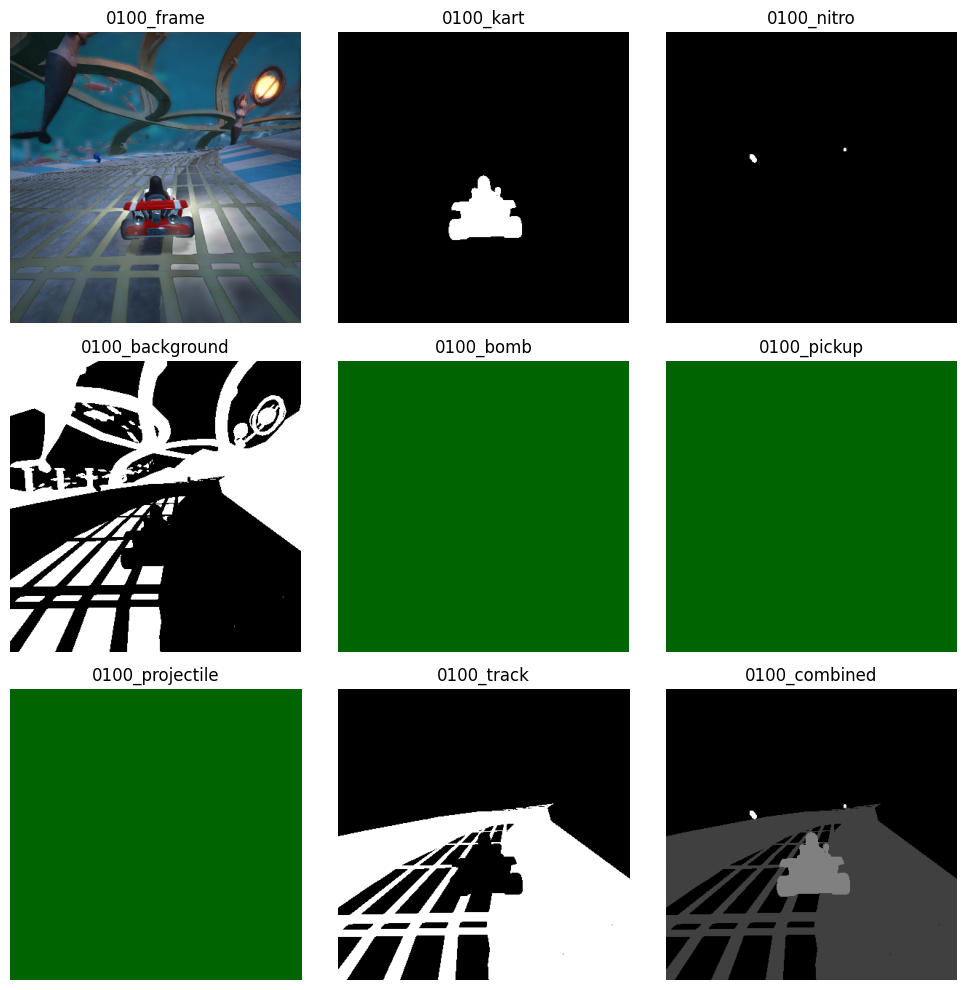

{'frame': 'frame', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=400x400 at 0x7F9159A70290>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_frame', 'image_prefix': 'frame', 'image_path': 'dense_data/abyss/frame/frame_0100.png'}
Comparing with mask: 0100_frame
{'kart': 'dense_data/abyss/kart/mask_0100.png', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=400x400 at 0x7F93101EA590>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_kart', 'image_prefix': 'mask', 'image_path': 'dense_data/abyss/kart/mask_0100.png', 'frame': 'kart'}
Comparing with mask: 0100_kart
{'nitro': 'dense_data/abyss/nitro/mask_0100.png', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=400x400 at 0x7F915810B6D0>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_nitro', 'image_prefix': 'mask', 'image_path': 'dense_data/abyss/nitro/mask_0100.png', 'frame': 'nitro'}
Comparing with mask: 0100_nitro
{'background': 'dense_

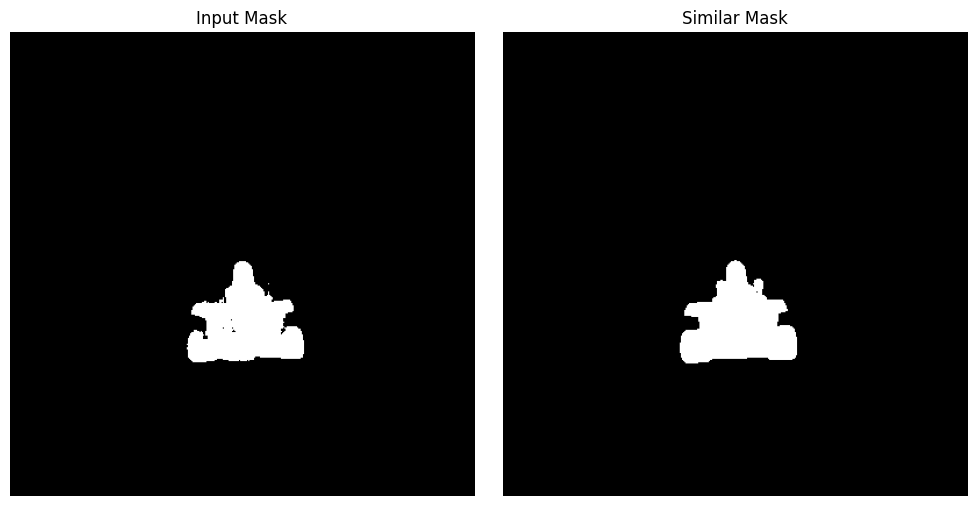

{'frame': 'frame', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=400x400 at 0x7F9159A70290>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_frame', 'image_prefix': 'frame', 'image_path': 'dense_data/abyss/frame/frame_0100.png'}
Comparing with mask: 0100_frame
{'kart': 'dense_data/abyss/kart/mask_0100.png', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=400x400 at 0x7F93101EA590>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_kart', 'image_prefix': 'mask', 'image_path': 'dense_data/abyss/kart/mask_0100.png', 'frame': 'kart'}
Comparing with mask: 0100_kart
{'nitro': 'dense_data/abyss/nitro/mask_0100.png', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=400x400 at 0x7F915810B6D0>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_nitro', 'image_prefix': 'mask', 'image_path': 'dense_data/abyss/nitro/mask_0100.png', 'frame': 'nitro'}
Comparing with mask: 0100_nitro
{'background': 'dense_

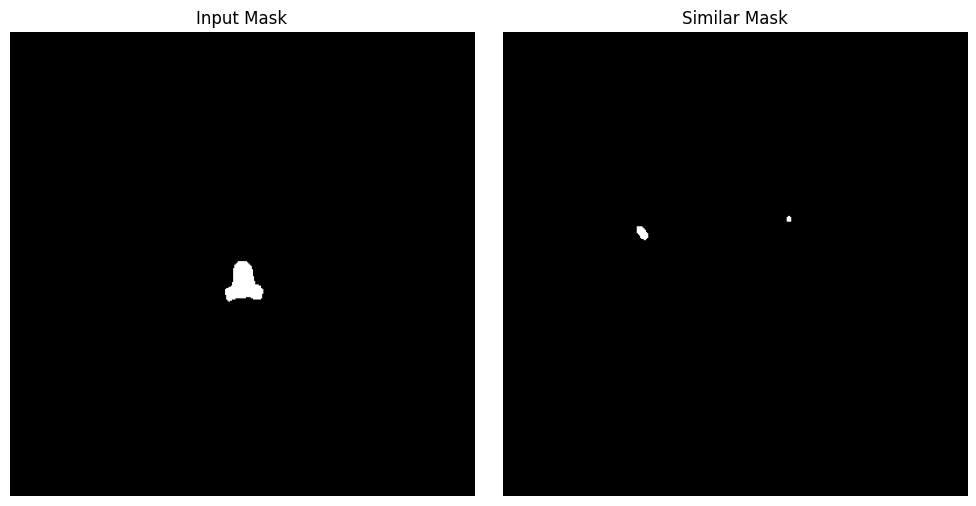

{'frame': 'frame', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=400x400 at 0x7F9159A70290>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_frame', 'image_prefix': 'frame', 'image_path': 'dense_data/abyss/frame/frame_0100.png'}
Comparing with mask: 0100_frame
{'kart': 'dense_data/abyss/kart/mask_0100.png', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=400x400 at 0x7F93101EA590>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_kart', 'image_prefix': 'mask', 'image_path': 'dense_data/abyss/kart/mask_0100.png', 'frame': 'kart'}
Comparing with mask: 0100_kart
{'nitro': 'dense_data/abyss/nitro/mask_0100.png', 'hasMask': True, 'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=400x400 at 0x7F915810B6D0>, 'name': '0100', 'road': 'abyss', 'mask_name': '0100_nitro', 'image_prefix': 'mask', 'image_path': 'dense_data/abyss/nitro/mask_0100.png', 'frame': 'nitro'}
Comparing with mask: 0100_nitro
{'background': 'dense_

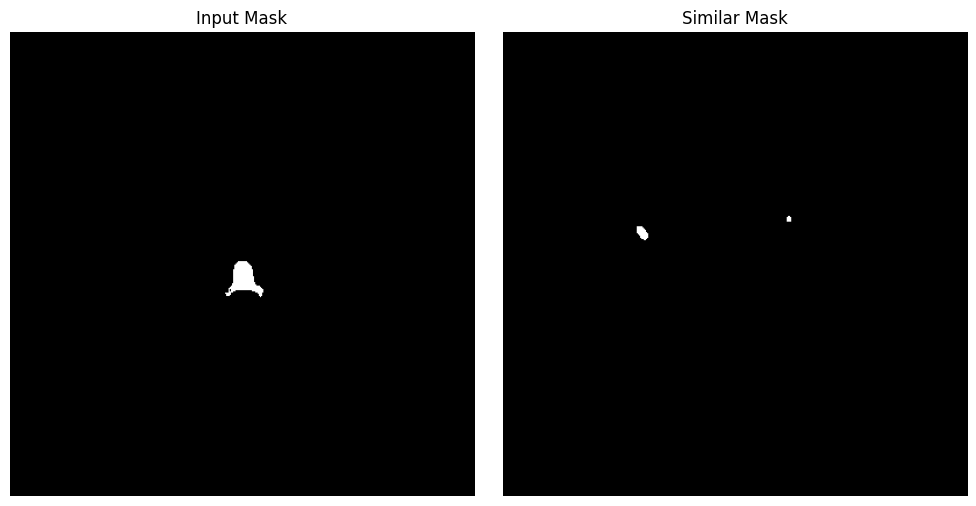

In [10]:
frame = kart_frame("0100", "abyss")
frame.print_info()  
frame.print_masks()

for mask in masks:
   
    similarity, similar_mask = frame.get_similar_mask(mask)

    print(f"Similarity: {similarity:.3f}")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(mask, cmap="gray")
    plt.title("Input Mask")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(similar_mask, cmap="gray")
    plt.title("Similar Mask")
    plt.axis("off")
    plt.tight_layout()
    plt.show()


In [11]:
!pip install peft


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, ConcatDataset
from torchvision.transforms import v2
from PIL import Image
import math
import time
from segment_anything import sam_model_registry

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Configuración ---
sam_checkpoint = "sam_vit_b_01ec64.pth"
model_type = "vit_b"
num_classes = 7
batch_size = 10
epochs = 3

# --- Cargar modelo SAM ---
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint).to(device)
sam.eval()
image_encoder = sam.image_encoder

# --- LoRA ---
class LoRALinear(nn.Module):
    def __init__(self, original_linear, r=8, alpha=16):
        super().__init__()
        self.original = original_linear
        self.r = r
        self.alpha = alpha
        in_features = original_linear.in_features
        out_features = original_linear.out_features

        self.lora_down = nn.Linear(in_features, r, bias=False)
        self.lora_up = nn.Linear(r, out_features, bias=False)
        self.scaling = alpha / r

        nn.init.kaiming_uniform_(self.lora_down.weight, a=math.sqrt(5))
        nn.init.zeros_(self.lora_up.weight)

    def forward(self, x):
        return self.original(x) + self.scaling * self.lora_up(self.lora_down(x))

def inject_lora_into_sam(sam, r=8, alpha=16, target_blocks=[8,9,10,11]):
    for name, module in sam.image_encoder.named_modules():
        for block_idx in target_blocks:
            if name == f"blocks.{block_idx}.attn" and hasattr(module, 'qkv') and isinstance(module.qkv, nn.Linear):
                print(f"Inyectando LoRA en: {name}.qkv")
                module.qkv = LoRALinear(module.qkv, r=r, alpha=alpha).to(device)

inject_lora_into_sam(sam)

# --- Segmentación con SAM + LoRA ---
class SAMLoRASegmentation(nn.Module):
    def __init__(self, encoder, num_classes):
        super().__init__()
        self.encoder = encoder
        self.decoder = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=4),
            nn.Conv2d(128, num_classes, kernel_size=1)
        )

    def forward(self, x):
        embeddings = self.encoder(x)
        return self.decoder(embeddings)

model = SAMLoRASegmentation(sam.image_encoder, num_classes).to(device)

# --- Normalización ImagenNet ---
mean = torch.tensor([123.675, 116.28, 103.53], device=device) / 255.0
std = torch.tensor([58.395, 57.12, 57.375], device=device) / 255.0

transform_img_old = v2.Compose([
    v2.ToImage(),
    v2.Resize((1024, 1024)),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=mean.tolist(), std=std.tolist())
])

transform_img = v2.Compose([
    v2.ToImage(),
    v2.Resize((1024, 1024)),
    v2.RandomHorizontalFlip(),
    v2.RandomRotation(degrees=15),
    v2.ColorJitter(brightness=0.2, contrast=0.2),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=mean.tolist(), std=std.tolist())
])

transform_mask = v2.Compose([
    v2.ToImage(),
    v2.Resize((256, 256), interpolation=Image.NEAREST),
    v2.ToDtype(torch.int64)
])

class DiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super().__init__()
        self.smooth = smooth

    def forward(self, logits, targets):
        logits = torch.softmax(logits, dim=1)
        targets_one_hot = F.one_hot(targets, num_classes=logits.shape[1]).permute(0, 3, 1, 2).float()
        
        intersection = (logits * targets_one_hot).sum(dim=(2, 3))
        union = logits.sum(dim=(2, 3)) + targets_one_hot.sum(dim=(2, 3))
        dice = (2. * intersection + self.smooth) / (union + self.smooth)
        return 1 - dice.mean()
    
# --- Dataset ---
tracks = ["olivermath", "abyss", "gran_paradiso_island", "lighthouse", "volcano_island", "hacienda"]
dataset = SuperTuxKartDataset(root_dir="dense_data", tracks=tracks,
                              transform_img=transform_img, transform_mask=transform_mask)

rare_samples = get_rare_sample(dataset)
augmented_dataset = ConcatDataset([dataset] + [rare_samples] * 50)

train_size = int(0.8 * len(augmented_dataset))
train_dataset, test_dataset = random_split(augmented_dataset, [train_size, len(augmented_dataset) - train_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# --- Solo entrenar LoRA y decoder ---
for name, param in model.named_parameters():
    if "lora" not in name.lower() and "decoder" not in name:
        param.requires_grad = False

optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)
scaler = torch.cuda.amp.GradScaler(enabled=(device.type == "cuda"))

# --- Entrenamiento ---
for epoch in range(epochs):
    print("----" * 20)
    print(f"Epoch {epoch + 1}/{epochs}")
    model.train()
    total_loss = 0
    counting = 0
    start_time = time.perf_counter()

    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)

        with torch.cuda.amp.autocast(enabled=(device.type == "cuda")):
            preds = model(images)
            #loss = F.cross_entropy(preds, masks.squeeze(1))
            dice_loss = DiceLoss()
            loss = 0.5 * F.cross_entropy(preds, masks.squeeze(1)) + 0.5 * dice_loss(preds, masks.squeeze(1))

        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()
        counting += 1

        if counting % 100 == 0:
            elapsed = time.perf_counter() - start_time
            print(f"Batch: {counting}/{len(train_loader)} | Loss: {loss.item():.4f} | Time: {elapsed:.2f}s")

    print(f"[{epoch + 1}/{epochs}] Total Loss: {total_loss:.4f}")

torch.save(model.state_dict(), "sam_lora_segmentation-v2.pth")
print("Modelo guardado en 'sam_lora_segmentation-v2.pth'")

Inyectando LoRA en: blocks.8.attn.qkv
Inyectando LoRA en: blocks.9.attn.qkv
Inyectando LoRA en: blocks.10.attn.qkv
Inyectando LoRA en: blocks.11.attn.qkv


/tmp/ipykernel_73262/3273019570.py:133: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(device.type == "cuda"))
/tmp/ipykernel_73262/3273019570.py:147: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(device.type == "cuda")):


--------------------------------------------------------------------------------
Epoch 1/3
Batch: 100/3800 | Loss: 0.5965 | Time: 56.10s
Batch: 200/3800 | Loss: 0.5450 | Time: 112.47s
Batch: 300/3800 | Loss: 0.4671 | Time: 168.41s
Batch: 400/3800 | Loss: 0.4183 | Time: 224.17s
Batch: 500/3800 | Loss: 0.2741 | Time: 279.88s
Batch: 600/3800 | Loss: 0.2252 | Time: 335.39s
Batch: 700/3800 | Loss: 0.2665 | Time: 390.78s
Batch: 800/3800 | Loss: 0.2607 | Time: 446.14s
Batch: 900/3800 | Loss: 0.2690 | Time: 501.11s
Batch: 1000/3800 | Loss: 0.2240 | Time: 556.27s
Batch: 1100/3800 | Loss: 0.2598 | Time: 611.23s
Batch: 1200/3800 | Loss: 0.2220 | Time: 666.11s
Batch: 1300/3800 | Loss: 0.3563 | Time: 720.99s
Batch: 1400/3800 | Loss: 0.2046 | Time: 775.93s
Batch: 1500/3800 | Loss: 0.3066 | Time: 830.77s
Batch: 1600/3800 | Loss: 0.2747 | Time: 885.83s
Batch: 1700/3800 | Loss: 0.2891 | Time: 940.77s
Batch: 1800/3800 | Loss: 0.2198 | Time: 995.72s
Batch: 1900/3800 | Loss: 0.3013 | Time: 1050.85s
Batch:

In [14]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score

# Directorio para guardar resultados
os.makedirs("outputs/predictions", exist_ok=True)

model.eval()
test_loss = 0
all_preds = []
all_targets = []

with torch.no_grad():
    counter = 0
    for batch_idx, (images, masks) in enumerate(test_loader):
        images, masks = images.to(device), masks.to(device)

        if counter % 10 == 0:
            print(f"Processing {counter} of {len(test_loader)}")

        with torch.amp.autocast(device_type=device.type, enabled=(device.type == "cuda")):
            preds = model(images)
            loss = F.cross_entropy(preds, masks.squeeze(1))
            test_loss += loss.item()

        # Predicción de clases por pixel
        pred_classes = torch.argmax(preds, dim=1)  # [B, H, W]

        # Almacenar métricas
        all_preds.extend(pred_classes.view(-1).cpu().numpy())
        all_targets.extend(masks.view(-1).cpu().numpy())

        # --- RECONSTRUCCIÓN Y GUARDADO ---
        for i in range(images.size(0)):
            pred_mask = pred_classes[i].cpu().numpy().astype(np.uint8)
            gt_mask = masks[i].squeeze().cpu().numpy().astype(np.uint8)

            # Opcional: aplicar un colormap para visualizar
            color_pred = cv2.applyColorMap((pred_mask * 30).astype(np.uint8), cv2.COLORMAP_JET)
            color_gt = cv2.applyColorMap((gt_mask * 30).astype(np.uint8), cv2.COLORMAP_JET)

            # Guardar ambas
            cv2.imwrite(f"outputs/predictions/pred_{counter}_{i}.png", color_pred)
            cv2.imwrite(f"outputs/predictions/gt_{counter}_{i}.png", color_gt)

        counter += 1

# Métricas finales
avg_test_loss = test_loss / len(test_loader)
mean_iou = jaccard_score(all_targets, all_preds, average="macro", zero_division=0)

print(f"Validation Loss: {avg_test_loss:.4f} | Mean IoU: {mean_iou:.4f}")

Processing 0 of 950
Processing 10 of 950
Processing 20 of 950
Processing 30 of 950
Processing 40 of 950
Processing 50 of 950
Processing 60 of 950
Processing 70 of 950
Processing 80 of 950
Processing 90 of 950
Processing 100 of 950
Processing 110 of 950
Processing 120 of 950
Processing 130 of 950
Processing 140 of 950
Processing 150 of 950
Processing 160 of 950
Processing 170 of 950
Processing 180 of 950
Processing 190 of 950
Processing 200 of 950
Processing 210 of 950
Processing 220 of 950
Processing 230 of 950
Processing 240 of 950
Processing 250 of 950
Processing 260 of 950
Processing 270 of 950
Processing 280 of 950
Processing 290 of 950
Processing 300 of 950
Processing 310 of 950
Processing 320 of 950
Processing 330 of 950
Processing 340 of 950
Processing 350 of 950
Processing 360 of 950
Processing 370 of 950
Processing 380 of 950
Processing 390 of 950
Processing 400 of 950
Processing 410 of 950
Processing 420 of 950
Processing 430 of 950
Processing 440 of 950
Processing 450 of 950

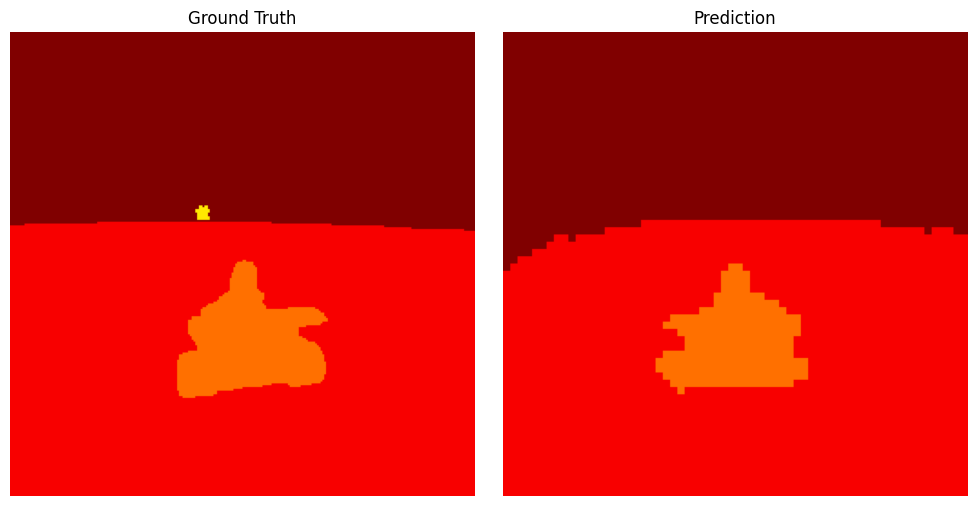

In [15]:
# Mostrar predicción y ground truth
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(color_gt)
axs[0].set_title("Ground Truth")
axs[0].axis("off")

axs[1].imshow(color_pred)
axs[1].set_title("Prediction")
axs[1].axis("off")

plt.tight_layout()
plt.show()